In [24]:
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import numpy as np

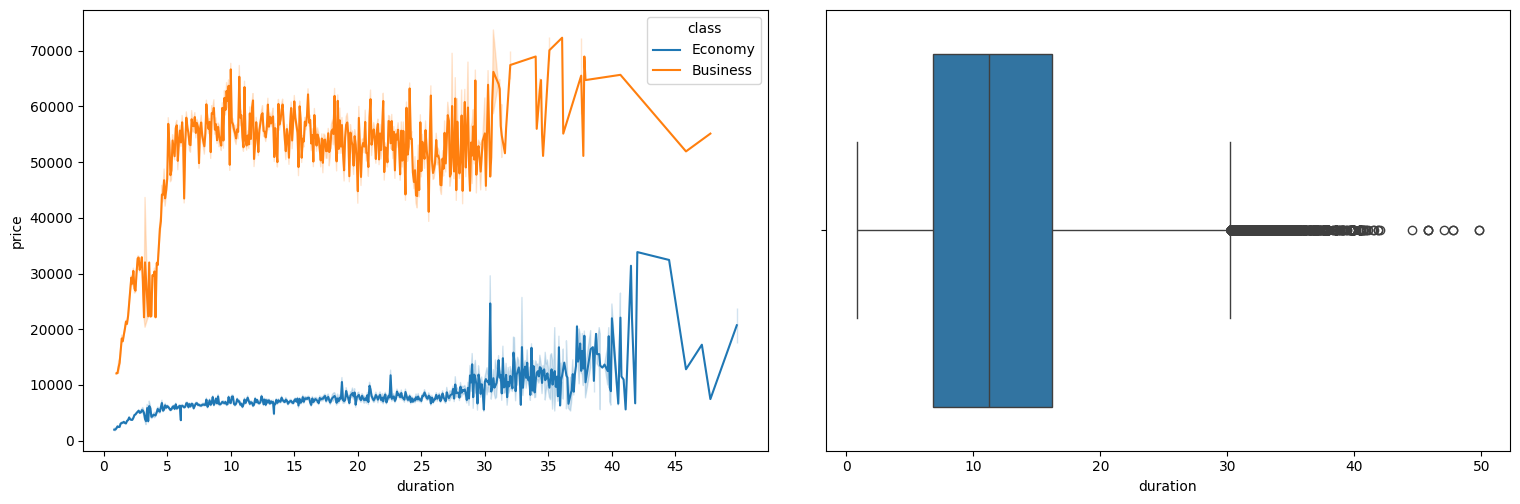

In [25]:
df = pandas.read_csv('Clean_Dataset.csv')

# Drop useless columns
columns_to_drop = ['Unnamed: 0', 'flight']
df = df.drop(columns=columns_to_drop)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Left ax
sns.lineplot(x='duration', y='price', data=df, ax=ax[0], hue='class').set_xticks(np.arange(0, 50, 5))
# Right AX
sns.boxplot(data=df, x='duration', ax=ax[1])
plt.show()


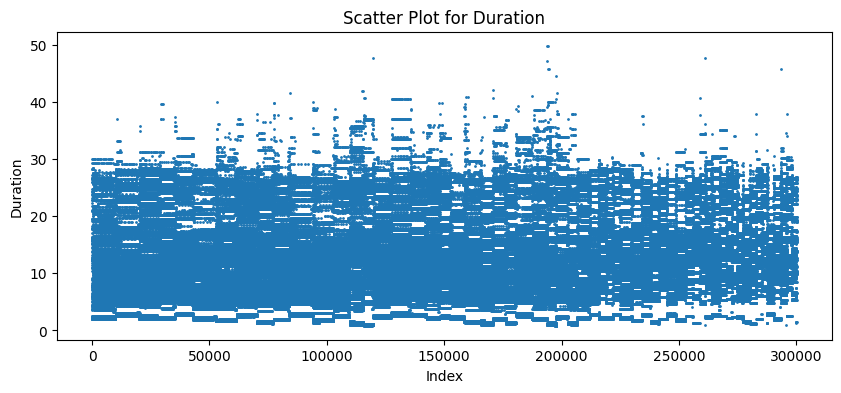

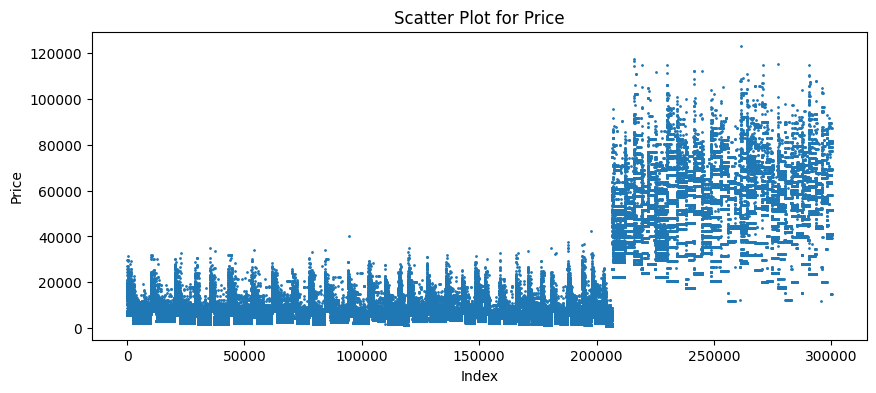

In [26]:
# Scatter plot for 'duration'
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df['duration'], s=1)
plt.title('Scatter Plot for Duration')
plt.xlabel('Index')
plt.ylabel('Duration')
plt.show()

# Scatter plot for 'price'
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df['price'], s=1)
plt.title('Scatter Plot for Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

In [27]:

# Label encoding for class column
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])


# One-hot encoding
columns_to_onehot = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops']

ohe = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded = ohe.fit_transform(df[columns_to_onehot])

df_encoded = pandas.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(columns_to_onehot))
df = pandas.concat([df.drop(columns=columns_to_onehot), df_encoded], axis=1)
# print(df)

In [28]:
def get_outlier_indices(df, features):
    outlier_indices = []

    for c in features:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))
    return outlier_indices

def remove_outliers(df, features):
    outlier_indices = get_outlier_indices(df, features)
    df_cleaned = df.drop(outlier_indices)
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned

In [29]:
df = remove_outliers(df, ['duration', 'price'])